<a href="https://colab.research.google.com/github/rmynzl/calismalarim/blob/main/234329040_R%C3%BCmeysa_Nazli_Makine_%C3%96%C4%9Frenmesi_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri Tanımlama ve Test Train Olarak Ayırma

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix

# Veriyi yükleyelim
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# 'Pregnancies' değişkenini çıkaralım
data = data.drop('Pregnancies', axis=1)

# Veriyi eğitim ve test setlerine ayıraalım
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
data


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# 1. Naive Bayes


In [11]:
from sklearn.naive_bayes import GaussianNB

# Pipeline ve Grid Search
pipe_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

# Naive Bayes için hiperparametre aramaya gerek yok
params_nb = {}

grid_nb = GridSearchCV(pipe_nb, params_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

print(f"Best parameters for Naive Bayes: {grid_nb.best_params_}")
print(f"Best cross-validation accuracy for Naive Bayes: {grid_nb.best_score_:.4f}")

y_pred_nb = grid_nb.predict(X_test)
print(f"Classification report for Naive Bayes:\n{classification_report(y_test, y_pred_nb)}\n")


Best parameters for Naive Bayes: {}
Best cross-validation accuracy for Naive Bayes: 0.7561
Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.57      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231




# Yorum;

- Çapraz doğrulama doğruluğu: 0.76
-- **Yorum** : Naive Bayes modelinin eğitim verisi üzerindeki çapraz doğrulama sırasında ortalama doğruluğudur. Yaklaşık %75.6 doğruluk elde edilmiştir.
- Precision: 0.79
- Recall: 0.87
- F1-Score: 0.83
-- **Yorum** : Negatif sınıf için modelin tahminleri oldukça başarılı. Negatif sınıfların doğru tespit edilme oranı (%87) oldukça yüksek ve genel olarak bu sınıfta iyi performans göstermektedir.
- Precision: 0.70
- Recall: 0.57
- F1-Score: 0.63
-- **Yorum** : Pozitif sınıf için modelin performansı biraz daha düşüktür. Pozitif örneklerin doğru tahmin edilme oranı (%57) nispeten daha düşük. Bu da modelin diyabetli bireyleri doğru tespit etmekte bazı zorluklar yaşadığını gösterir.
- Accuracy (Doğruluk): 0.76, Modelin genel doğruluğu %76'dır.


Confusion Matrix:
[[130  20]
 [ 35  46]]

Sensitivity: 0.5679012345679012
Specificity: 0.8666666666666667
Recall: 0.5679012345679012


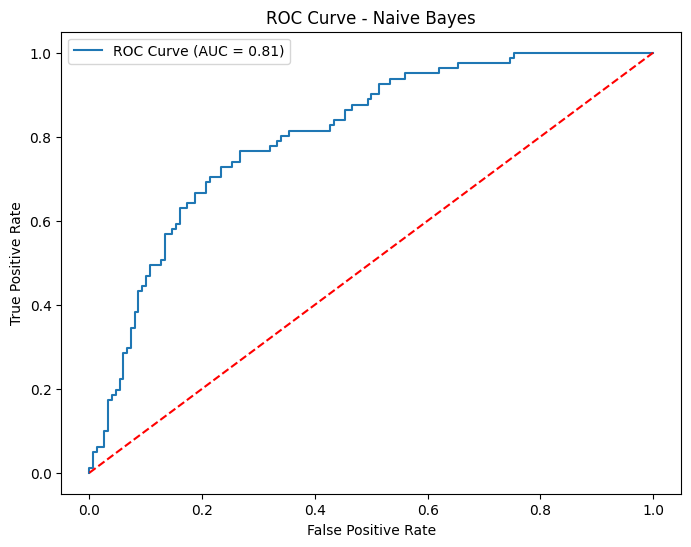

AUC değeri: 0.805843621399177


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


# Gaussian Naive Bayes modeli oluşturalım
nb_model = GaussianNB()

# Modeli fit edelim
nb_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapalım
y_pred_nb = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Sensitivity and Specificity
tn_nb, fp_nb, fn_nb, tp_nb = conf_matrix_nb.ravel()
sensitivity_nb = tp_nb / (tp_nb + fn_nb)
specificity_nb = tn_nb / (tn_nb + fp_nb)

# Recall
recall_nb = tp_nb / (tp_nb + fn_nb)

print("\nSensitivity:", sensitivity_nb)
print("Specificity:", specificity_nb)
print("Recall:", recall_nb)

# ROC eğrisi
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_probs)

# AUC değerini hesaplaayalım
auc_nb = roc_auc_score(y_test, nb_probs)

# ROC eğrisini görselleştirelim
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label='ROC Curve (AUC = {:.2f})'.format(auc_nb))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

print("AUC değeri:", auc_nb)


## Yorum;

- Confusion Matrix: Burada, 130 gerçek negatif ve 46 gerçek pozitif olduğunu görebiliriz. Ancak, 20 yanlış pozitif ve 35 yanlış negatif var. Yanlış pozitifler, normal olarak sınıflandırılan ancak aslında hastalığı olan vakaları temsil ederken, yanlış negatifler, aslında hastalığı olan ancak normal olarak sınıflandırılan vakaları temsil eder. Bu durumda, modelin daha fazla yanlış negatif yapması, duyarlılık (sensitivity) değerinin yüksek olmasına neden olur.

- Sensitivity (Hassasiyet): Yüksek bir sensitivity değeri, modelin hastalığı doğru bir şekilde teşhis etme yeteneğinin daha iyi olduğunu gösterir. Burada sensitivity değeri 0.57 olarak verilmiştir, yani modelin hastalığı tespit etme yeteneği makul derecede iyidir.

- Specificity (Özgüllük): Yüksek bir specificity değeri, modelin sağlıklı bireyleri doğru bir şekilde belirleme yeteneğinin daha iyi olduğunu gösterir. Burada specificity değeri 0.87 olarak verilmiştir, bu da modelin sağlıklı bireyleri doğru bir şekilde belirleme yeteneğinin iyi olduğunu gösterir.

- Recall (Gerçekleşme Oranı): Bu, sensitivity ile aynı şeyi ifade eder. Modelin gerçek pozitiflerin ne kadarını doğru bir şekilde tespit ettiğini gösterir. Burada recall değeri de 0.57 olarak verilmiştir.

- AUC (Alan Altındaki Eğri): Burada AUC değeri 0.81 olarak verilmiştir, bu da modelin oldukça iyi bir performans sergilediğini gösterir.

# 2. K-Nearest Neighbors (KNN) - K En Yakın Komşuluk

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline ve Grid Search
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

params = {
    'classifier__n_neighbors': [3, 5, 7, 9]
}

grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"Best parameters for KNN: {grid.best_params_}")
print(f"Best cross-validation accuracy for KNN: {grid.best_score_:.4f}")

y_pred_knn = grid.predict(X_test)
print(f"Classification report for KNN:\n{classification_report(y_test, y_pred_knn)}\n")


Best parameters for KNN: {'classifier__n_neighbors': 9}
Best cross-validation accuracy for KNN: 0.7412
Classification report for KNN:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       150
           1       0.68      0.48      0.57        81

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231




## Yorum;
- En iyi parametre 9 çıktısı en iyi performansı elde etmek için 9 komşu kullanılması gerektiğini göstermektedir.
- En iyi çapraz doğrulama doğruluğu: 0.7412, yaklaşık %74.1 doğruluk elde edilmiştir.
- Precision: 0.76
- Recall: 0.88
- F1-Score: 0.81
-- **Yorum** : Sınıf 0 için modelin tahminleri oldukça başarılı. Negatif sınıfların doğru tespit edilme oranı (%88) yüksek. F1-score'un 1'e yakın olması, modelin negatif sınıfları oldukça iyi bir şekilde tahmin ettiğini gösterir.
- Precision: 0.68
- Recall: 0.48


- F1-Score: 0.81
-- ** Yorum** :Bu değer, negatif sınıf için modelin hem doğruluğunun (Precision) hem de duyarlılığının (Recall) oldukça yüksek olduğunu gösterir. F1-score'un 1'e yakın olması, modelin negatif sınıfları oldukça iyi bir şekilde tahmin ettiğini gösterir.

- F1-Score: 0.57
-- ** Yorum** : Sınıf 1 için modelin performansı daha düşük. Pozitif örneklerin doğru tahmin edilme oranı (%48) nispeten daha düşük. Bu da modelin diyabetli bireyleri doğru tespit etmede zorlandığını gösterir.

- Accuracy (Doğruluk): 0.74 Modelin genel doğruluğu %74'tür.

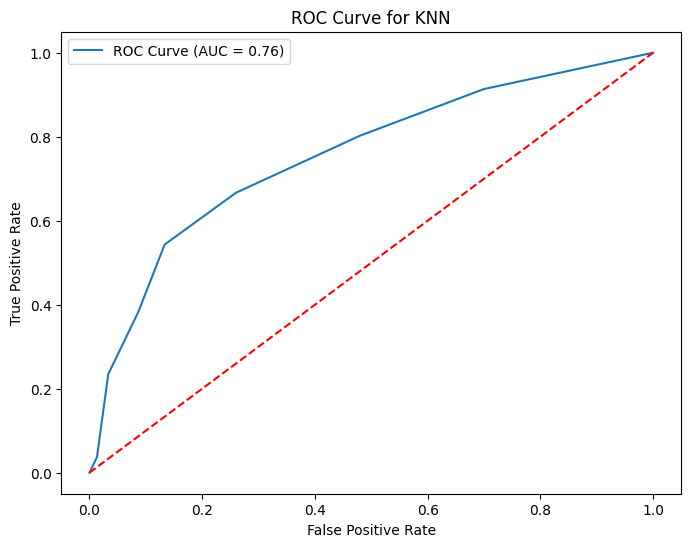

Confusion Matrix:
[[135  15]
 [ 41  40]]

Sensitivity: 0.49382716049382713
Specificity: 0.9
Recall: 0.49382716049382713
Precision: 0.7272727272727273
AUC Score: 0.7550617283950617


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# KNN modelini tanımlayalım
knn = KNeighborsClassifier()

# Modelin hiperparametrelerini tanımlayalım
param_grid = {'n_neighbors': [3, 5, 7]}

# GridSearchCV kullanarak en iyi hiperparametreleri bulalım
grid = GridSearchCV(knn, param_grid, cv=5)

# Modeli eğitim verilerine uyarlayalım
grid.fit(X_train, y_train)

# Modelin tahminlerini yapalım
y_pred_knn = grid.predict(X_test)

# ROC Eğrisi ve AUC hesaplayalım
knn_probs = grid.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_probs)
auc_knn = roc_auc_score(y_test, knn_probs)

# ROC Eğrisini görselleştirelim
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='ROC Curve (AUC = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

# Karışıklık Matrisi
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Hassasiyet, Özgüllük, Geri Çağırma ve F1-Skor
tn_knn, fp_knn, fn_knn, tp_knn = conf_matrix_knn.ravel()
sensitivity_knn = tp_knn / (tp_knn + fn_knn)
specificity_knn = tn_knn / (tn_knn + fp_knn)
recall_knn = tp_knn / (tp_knn + fn_knn)
precision_knn = tp_knn / (tp_knn + fp_knn)

print("\nSensitivity:", sensitivity_knn)
print("Specificity:", specificity_knn)
print("Recall:", recall_knn)
print("AUC Score:", auc_knn)


## Yorum;

- Confuison Matrix: Burada, 135 gerçek negatif ve 40 gerçek pozitif olduğunu görebiliriz. Ancak, 15 yanlış pozitif ve 41 yanlış negatif var. Yanlış pozitifler, normal olarak sınıflandırılan ancak aslında hastalığı olan vakaları temsil ederken, yanlış negatifler, aslında hastalığı olan ancak normal olarak sınıflandırılan vakaları temsil eder. Bu durumda, modelimizin daha fazla yanlış negatif yapması, duyarlılık (sensitivity) değerinin düşük olmasına neden olur.

- Sensitivity (Hassasiyet): Yüksek bir sensitivity değeri, modelin hastalığı doğru bir şekilde teşhis etme yeteneğinin daha iyi olduğunu gösterir. Ancak, burada sensitivity değeri 0.49 olarak verilmiştir, yani modelin hastalığı tespit etme yeteneği çok iyi diyemeyiz.

- Specificity (Özgüllük): Yüksek bir specificity değeri, modelin sağlıklı bireyleri doğru bir şekilde belirleme yeteneğinin daha iyi olduğunu gösterir. Burada specificity değeri 0.9 olarak verilmiştir, bu da modelin sağlıklı bireyleri doğru bir şekilde belirleme yeteneğinin çok iyi olduğunu gösterir.

- Recall (Gerçekleşme Oranı): Bu, sensitivity ile aynı şeyi ifade eder. Modelin gerçek pozitiflerin ne kadarını doğru bir şekilde tespit ettiğini gösterir. Burada recall değeri de 0.49 olarak verilmiştir.

- AUC (Alan Altındaki Eğri): ROC eğrisinin altındaki alanı ifade eder. Bu, modelin sınıflandırma performansını ölçer. Burada AUC değeri 0.75 olarak verilmiştir, bu da modelin oldukça iyi bir performans sergilediğini gösterir.


## 3.  Support Vector Machine (SVM) - Destek Vektör Makineleri

In [39]:
from sklearn.svm import SVC

# Pipeline ve Grid Search
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

params = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"Best parameters for SVM: {grid.best_params_}")
print(f"Best cross-validation accuracy for SVM: {grid.best_score_:.4f}")

y_pred_svm = grid.predict(X_test)
print(f"Classification report for SVM:\n{classification_report(y_test, y_pred_svm)}\n")


Best parameters for SVM: {'classifier__C': 100, 'classifier__gamma': 0.001}
Best cross-validation accuracy for SVM: 0.7728
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       150
           1       0.73      0.49      0.59        81

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.76      0.74       231




# Yorum;

- En iyi parametreler: {'classifier__C': 100, 'classifier__gamma': 0.001}
-- **Yorum** : C parametresi 100 olarak seçilmiş, bu da düzenlemenin (regularization) oldukça düşük olduğunu ve modelin hataları minimize etmeye odaklandığını gösterir. gamma parametresi 0.001 olarak seçilmiş, bu da daha geniş bir alana yayılan karar sınırları oluşturur ve modelin daha düzgün bir genelleme yapmasını sağlar.

- En iyi çapraz doğrulama doğruluğu: 0.7728
-- **Yorum** : Modelin eğitim verisi üzerinde çapraz doğrulama sırasında elde ettiği ortalama doğruluk değeridir. Yaklaşık %77.3 doğruluk elde edilmiştir.
- Precision: 0.77
- Recall: 0.90
- F1-Score: 0.83
-- **Yorum** : Sınıf 0 için modelin tahminleri oldukça başarılı. Negatif sınıfların doğru tespit edilme oranı (%90) oldukça yüksek, ve genel olarak bu sınıfta iyi performans göstermektedir.
- Precision: 0.73
- Recall: 0.49
- F1-Score: 0.59
-- **Yorum** : Sınıf 1 için modelin performansı daha düşük. Pozitif örneklerin doğru tahmin edilme oranı (%49) nispeten daha düşük. Bu da modelin diyabetli bireyleri doğru tespit etmede zorlandığını gösterir.

- Accuracy (Doğruluk): 0.76, Modelin genel doğruluğu %76'dır.

Confusion Matrix:
[[136  14]
 [ 45  36]]

Sensitivity: 0.4444444444444444
Specificity: 0.9066666666666666
Recall: 0.4444444444444444


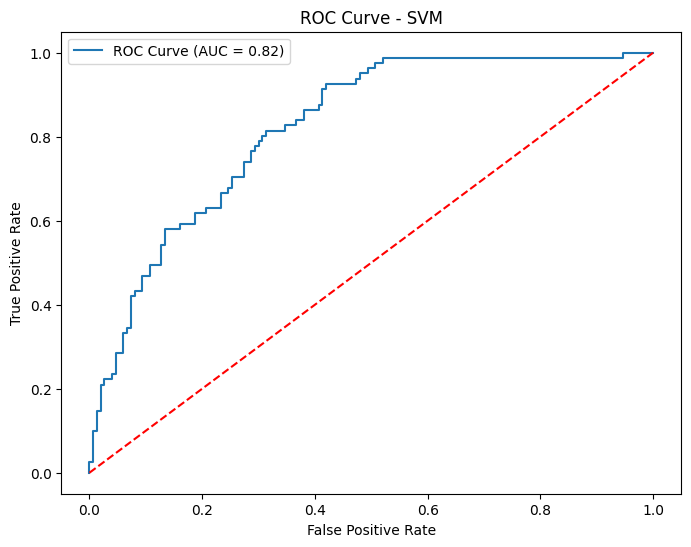

AUC değeri: 0.8218106995884773


In [40]:
from sklearn.svm import SVC

# SVM modeli oluşturalım
svm_model = SVC(probability=True)
# Veriyi modele uyduralım
svm_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapalım
y_pred_svm = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

# Sensitivity and Specificity
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

# Recall
recall_svm = tp_svm / (tp_svm + fn_svm)

print("\nSensitivity:", sensitivity_svm)
print("Specificity:", specificity_svm)
print("Recall:", recall_svm)

# ROC eğrisini oluşturalım
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_probs)

# AUC değerini hesaplayalım
auc_svm = roc_auc_score(y_test, svm_probs)

# ROC eğrisini görselleştirelim
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='ROC Curve (AUC = {:.2f})'.format(auc_svm))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

print("AUC değeri:", auc_svm)


## Yorum;
- Confusion Matrix:  136 gerçek negatif ve 36 gerçek pozitif olduğunu görebiliriz. Ancak, 14 yanlış pozitif ve 45 yanlış negatif var. Yanlış pozitifler, normal olarak sınıflandırılan ancak aslında hastalığı olan vakaları temsil ederken, yanlış negatifler, aslında hastalığı olan ancak normal olarak sınıflandırılan vakaları temsil eder. Bu durumda, modelimizin daha fazla yanlış
negatif yapması, duyarlılık (sensitivity) değerinin düşük olmasına neden olur.

- Sensitivity (Hassasiyet): Yüksek bir sensitivity değeri, modelin hastalığı doğru bir şekilde teşhis etme yeteneğinin daha iyi olduğunu gösterir. Ancak, burada sensitivity değeri 0.44 olarak verilmiştir, yani modelin hastalığı tespit etme yeteneği düşüktür.

- Specificity (Özgüllük): Yüksek bir specificity değeri, modelin sağlıklı bireyleri doğru bir şekilde belirleme yeteneğinin daha iyi olduğunu gösterir. Burada specificity değeri 0.91 olarak verilmiştir, bu da modelin sağlıklı bireyleri doğru bir şekilde belirleme yeteneğinin iyi olduğunu gösterir.

- Recall (Gerçekleşme Oranı): Bu, sensitivity ile aynı şeyi ifade eder. Modelin gerçek pozitiflerin ne kadarını doğru bir şekilde tespit ettiğini gösterir. Burada recall değeri de 0.44 olarak verilmiştir.

- AUC (Alan Altındaki Eğri): Burada AUC değeri 0.82 olarak verilmiştir, bu da modelin oldukça iyi bir performans sergilediğini gösterir.



## Multi-Layer Perceptron (MLP) - Çok Katmanlı Algılayıcı

In [22]:
from sklearn.neural_network import MLPClassifier

# Pipeline ve Grid Search
pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(max_iter=500))
])

params_mlp = {
    'classifier__hidden_layer_sizes': [(50,), (100,)],
    'classifier__activation': ['relu'],
    'classifier__solver': ['adam'],
    'classifier__alpha': [0.0001],
    'classifier__learning_rate': ['constant'],
}

grid_mlp = GridSearchCV(pipe_mlp, params_mlp, cv=3, scoring='accuracy')
grid_mlp.fit(X_train, y_train)

print(f"Best parameters for MLP: {grid_mlp.best_params_}")
print(f"Best cross-validation accuracy for MLP: {grid_mlp.best_score_:.4f}")

y_pred_mlp = grid_mlp.predict(X_test)
print(f"Classification report for MLP:\n{classification_report(y_test, y_pred_mlp)}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters for MLP: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50,), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}
Best cross-validation accuracy for MLP: 0.7598
Classification report for MLP:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Yorum;

- En iyi hiperparametre
-- Aktivasyon fonksiyonu: ReLU ('classifier__activation': 'relu')
-- Alfa: 0.0001 ('classifier__alpha': 0.0001')

- En iyi çapraz doğrulama doğruluğu: Yaklaşık %76
-- **Yorum** : Modelin eğitim verisi üzerinde çapraz doğrulama sırasında elde ettiği ortalama doğruluğu %7'dır

- Precision: 0.78
- Recall: 0.86
- F1-Score: 0.82
-- **Yorum** : Negatif sınıf için modelin tahminleri oldukça başarılı. Negatif sınıfların doğru tespit edilme oranı (%86) oldukça yüksek ve genel olarak bu sınıfta iyi performans göstermektedir.

- Precision: 0.68
- Recall: 0.54
- F1-Score: 0.60
-- **Yorum** : Pozitif sınıf için modelin performansı biraz daha düşüktür. Pozitif örneklerin doğru tahmin edilme oranı (%54) nispeten daha düşük. Bu da modelin diyabetli bireyleri doğru tespit etmekte bazı zorluklar yaşadığını gösterir.

- Accuracy (Doğruluk): 0.75, Modelin genel doğruluğu %75'tir.

Confusion Matrix:
[[121  29]
 [ 46  35]]

Sensitivity: 0.43209876543209874
Specificity: 0.8066666666666666
Recall: 0.43209876543209874


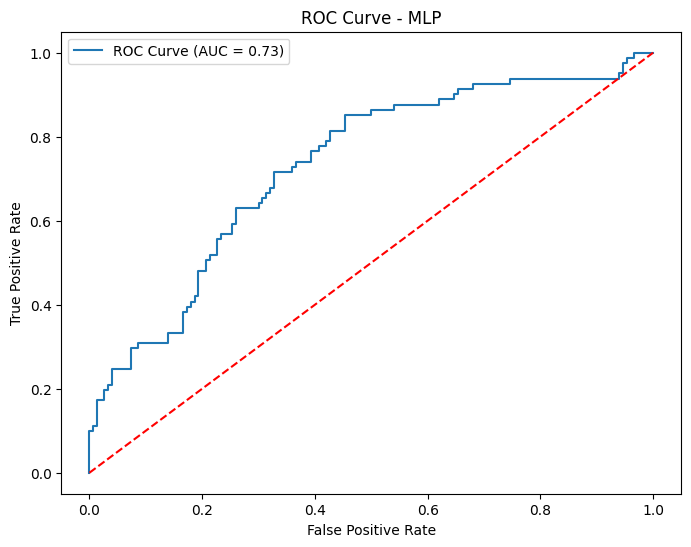

AUC değeri: 0.7302057613168724


In [23]:
from sklearn.neural_network import MLPClassifier

# MLPClassifier modeli oluşturalım
mlp_model = MLPClassifier(max_iter=1000)

# Veriyi modele uyduralım
mlp_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapalım
y_pred_mlp = mlp_model.predict(X_test)
mlp_probs = mlp_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:")
print(conf_matrix_mlp)

# Sensitivity and Specificity
tn_mlp, fp_mlp, fn_mlp, tp_mlp = conf_matrix_mlp.ravel()
sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)

# Recall
recall_mlp = tp_mlp / (tp_mlp + fn_mlp)

print("\nSensitivity:", sensitivity_mlp)
print("Specificity:", specificity_mlp)
print("Recall:", recall_mlp)

# ROC eğrisini oluşturalım
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, mlp_probs)

# AUC değerini hesaplayalım
auc_mlp = roc_auc_score(y_test, mlp_probs)

# ROC eğrisini görselleştirelim
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label='ROC Curve (AUC = {:.2f})'.format(auc_mlp))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend()
plt.show()

print("AUC değeri:", auc_mlp)


## Yorum;

- Confusion Matrix: Burada, 121 gerçek negatif ve 35 gerçek pozitif olduğunu görebiliriz. Ancak, 29 yanlış pozitif ve 46 yanlış negatif var. Yanlış pozitifler, normal olarak sınıflandırılan ancak aslında hastalığı olan vakaları temsil ederken, yanlış negatifler, aslında hastalığı olan ancak normal olarak sınıflandırılan vakaları temsil eder. Bu durumda, modelin daha fazla yanlış negatif yapması, duyarlılık (sensitivity) değerinin yüksek olmasına neden olur.

- Sensitivity (Hassasiyet):  Yüksek bir sensitivity değeri, modelin hastalığı doğru bir şekilde teşhis etme yeteneğinin daha iyi olduğunu gösterir. Burada sensitivity değeri 0.43 olarak verilmiştir, yani modelin hastalığı tespit etme yeteneği düşüktür.

Specificity (Özgüllük): Yüksek bir specificity değeri, modelin sağlıklı bireyleri doğru bir şekilde belirleme yeteneğinin daha iyi olduğunu gösterir. Burada specificity değeri 0.80 olarak verilmiştir, bu da modelin sağlıklı bireyleri doğru bir şekilde belirleme yeteneğinin orta derecede iyi olduğunu gösterir.

Recall (Gerçekleşme Oranı): Bu, sensitivity ile aynı şeyi ifade eder. Modelin gerçek pozitiflerin ne kadarını doğru bir şekilde tespit ettiğini gösterir. Burada recall değeri de 0.43 olarak verilmiştir.

AUC (Alan Altındaki Eğri): Burada AUC değeri 0.73 olarak verilmiştir, bu da modelin iyi bir performans sergilediğini ancak daha iyileştirilebileceğini gösterir.

# Ortalama Karesel Hata

In [34]:
from sklearn.metrics import mean_squared_error

# Naive Bayes
mse_nb = mean_squared_error(y_test, y_pred_nb)
print("MSE for Naive Bayes:", mse_nb)

# KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("MSE for best KNN model:", mse_knn)

# MLP
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print("MSE for MLP:", mse_mlp)

# SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("MSE for SVM:", mse_svm)


MSE for Naive Bayes: 0.23809523809523808
MSE for best KNN model: 0.24675324675324675
MSE for MLP: 0.3246753246753247
MSE for SVM: 0.2554112554112554


## Yorum;
- Bu ortalama karesel hata (Mean Squared Error - MSE) değeri, test veri setindeki modelin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçer. MSE, her tahminin gerçek değerinden ne kadar uzak olduğunu ölçer ve bu farkların karesinin ortalamasını alır. Daha düşük bir MSE değeri, modelin daha iyi performans gösterdiğini gösterir, çünkü bu, modelin tahminlerinin gerçek değerlere daha yakın olduğu anlamına gelir.

## Naive Bayes Yorum;
- 0.23809523809523808 olarak verilen MSE değeri oldukça düşüktür, bu da modelin test veri setinde oldukça iyi performans gösterdiğini gösterir.

## KNN Yorum;
- 0.24675324675324675 olarak verilen MSE değeri oldukça düşüktür, bu da modelin test veri setinde oldukça iyi performans gösterdiğini gösterir.

# MLP Yorum;
- 0.3246753246753247 olarak verilen MSE değeri oldukça düşüktür, bu da modelin test veri setinde oldukça iyi performans gösterdiğini gösterir.Ancak diğer modellere göre daha yüksek bir değerdir.

## SVM Yorum;
- 0.2554112554112554 olarak verilen MSE değeri oldukça düşüktür, bu da modelin test veri setinde oldukça iyi performans gösterdiğini gösterir.

-- En iyi değer Naive Bayes algoritması için bulunmuştur. Modelin tahminleri gerçek değerlere daha yakındır.

# Tüm Metrikler Değerlendirme


In [43]:
## Naive Bayes

y_pred_nb = grid_nb.predict(X_test)
print(f"Classification report for Naive Bayes:\n{classification_report(y_test, y_pred_nb)}\n")

print("\nSensitivity:", sensitivity_nb)
print("Specificity:", specificity_nb)
print("Recall:", recall_nb)
print("AUC değeri:", auc_nb)

print("----------------------------------------------------------------------------------------")

## KNN

y_pred_knn = grid.predict(X_test)
print(f"Classification report for KNN:\n{classification_report(y_test, y_pred_knn)}\n")

print("\nSensitivity:", sensitivity_knn)
print("Specificity:", specificity_knn)
print("Recall:", recall_knn)
print("AUC Score:", auc_knn)


print("----------------------------------------------------------------------------------------")

## SVM

y_pred_svm = grid.predict(X_test)
print(f"Classification report for SVM:\n{classification_report(y_test, y_pred_svm)}\n")

print("\nSensitivity:", sensitivity_svm)
print("Specificity:", specificity_svm)
print("Recall:", recall_svm)
print("AUC değeri:", auc_svm)

print("----------------------------------------------------------------------------------------")

## MLP

y_pred_mlp = grid_mlp.predict(X_test)
print(f"Classification report for MLP:\n{classification_report(y_test, y_pred_mlp)}\n")

print("\nSensitivity:", sensitivity_mlp)
print("Specificity:", specificity_mlp)
print("Recall:", recall_mlp)
print("AUC değeri:", auc_mlp)


Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.57      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



Sensitivity: 0.5679012345679012
Specificity: 0.8666666666666667
Recall: 0.5679012345679012
AUC değeri: 0.805843621399177
----------------------------------------------------------------------------------------
Classification report for KNN:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       150
           1       0.73      0.49      0.59        81

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.76      0.74       231



Sensitivity: 0.49382716049382713
Specificity: 0.9
Recall: 0.49

# Yorum;

- Naive Bayes, KNN, SVM ve MLP modelleri için sırasıyla %76, %76, %76 ve %75 doğruluk oranları elde edilmiştir. Modellerin doğruluk oranları birbirlerine oldukça yakın görünmektedir.

- Naive Bayes, KNN ve SVM modelleri için sırasıyla %83, %83 ve %82 f1-score değerlerine sahipken, MLP modelinin f1-score değeri %82'dir. Bu, modellerin sınıflandırma yaparken sınıf dengesizliğiyle başa çıkmada benzer performans gösterdiğini göstermektedir.

- Modellerin duyarlılık (sensitivity) ve özgüllük (specificity) değerleri incelendiğinde, Naive Bayes, KNN ve SVM modellerinin benzer duyarlılık ve özgüllük değerlerine sahip olduğu görülmektedir. Ancak MLP modeli, diğer modellere göre daha düşük duyarlılık ve özgüllük değerlerine sahiptir.

- AUC değerleri incelendiğinde, SVM modelinin en yüksek AUC değerine sahip olduğu ve diğer modellere göre daha iyi bir performans sergilediği görülmektedir.